In [1]:
# Chnage the directory accordingly
# Restart the Kernel if requires
%cd data/input/FPGA/NASA_TTT_Build1_001

/data-store/input/FPGA/NASA_TTT_Build1_001


In [2]:
import time
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Read .csv file into a dataframe & make required adjustments to the dataframe**

In [36]:
df = pd.read_csv('PositionTracker00100.csv')
df = df.drop(columns=['TTL 0']) # TTL 0 column is redundant since it corresponds to an unused camera
df = df[df['ADC Value']>1000] # ADC Value > 1000 indicates the laser is on
df["X Position"] = (df["X Position"]-32768)/172 # Co-ordinate correction
df["Y Position"] = (df["Y Position"]-32768)/172 # Co-ordinate correction
print(df.shape)
df.head()

(1260378, 6)


,System Time Stamp,Tracker Time Stamp,Y Position,X Position,ADC Value,TTL 1
20416,38600541802,3601721067,15.709302,42.930233,2440,False
20417,38600541802,3601721117,15.750000,42.895349,2486,False
20444,38600555720,3601722467,15.401163,43.267442,2438,False
20445,38600555720,3601722517,15.348837,43.308140,2495,True
20446,38600555720,3601722567,15.302326,43.348837,2503,True


**Plot the laser track**

In [52]:
# Function for plotting the laser track
def plot_laser_track(Layer_ID):
    file_name = Layer_ID + '.csv'
    df = pd.read_csv(file_name)
    df = df[df['ADC Value']>1000] # ADC Value > 1000 indicates the laser is on
    df["X Position"] = (df["X Position"]-32768)/172 # Co-ordinate correction
    df["Y Position"] = (df["Y Position"]-32768)/172 # Co-ordinate correction
    x_data = df['X Position'].to_numpy()
    y_data = df['Y Position'].to_numpy()
    plt.plot(x_data, y_data)
    plt.title(Layer_ID)

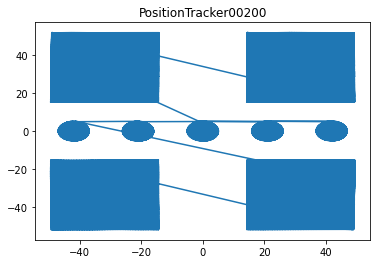

In [53]:
Layer_ID = 'PositionTracker00200'
plot_laser_track(Layer_ID)

**Animate the laser track**

In [54]:
# Function for animating the laser track
def animate_laser_track(Layer_ID, increment_points, pause_time):
    file_name = Layer_ID + '.csv'
    df = pd.read_csv(file_name)
    df = df[df['ADC Value']>1000] # ADC Value > 1000 indicates the laser is on
    df["X Position"] = (df["X Position"]-32768)/172 # Co-ordinate correction
    df["Y Position"] = (df["Y Position"]-32768)/172 # Co-ordinate correction
    x_data = df['X Position'].to_numpy()
    y_data = df['Y Position'].to_numpy()

    fig = plt.figure("Figure 1",figsize=(6.4, 4.8))
    ax = fig.add_subplot(1, 1, 1) 
    plt.title(Layer_ID)

    i_increment = increment_points
    i = len(x_data)%i_increment

    while i<=len(x_data):
        x = x_data[0:i];
        y = y_data[0:i]
        i += i_increment
        ax.set_xlim(np.min(x_data)-1, np.max(x_data)+1)
        ax.set_ylim(np.min(y_data)-1, np.max(y_data)+1)    
        ax.plot(x, y,'b')
        ax.set_xlabel("Abscissa, x")
        ax.set_ylabel("Ordinate, y")
        display(fig)
        clear_output(wait = True)
        plt.pause(pause_time)

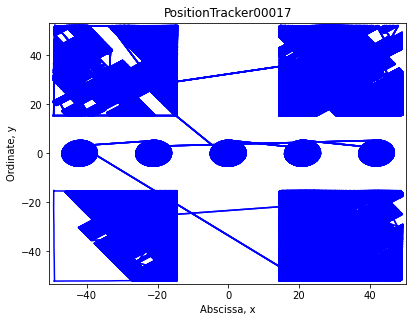

In [55]:
Layer_ID = 'PositionTracker00017'
increment_points = 100000 # number of additional points spanned in next frame
pause_time = 0.1 # pause time in second
animate_laser_track(Layer_ID, increment_points, pause_time)